In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# import label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
Etrain = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/As2-EEET574/Merged_dataset/Electricity/E-train.csv')
Etest = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/As2-EEET574/Merged_dataset/Electricity/E-test.csv')
Etrain.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year,Type,Company
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89.0,1x35,4122.0,89.47,0.0,2018,Electricity,Coteq
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37,100.00,100.00,86.0,1x35,1800.0,94.59,0.0,2018,Electricity,Coteq
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100.0,1x35,1315.0,100.00,0.0,2018,Electricity,Coteq
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25,92.00,84.00,44.0,1x35,6379.0,92.00,0.0,2018,Electricity,Coteq
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36.0,1x35,4404.0,92.86,0.0,2018,Electricity,Coteq


In [3]:
Electricity = pd.concat([Etrain, Etest], axis=0)

In [4]:
Electricity

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year,Type,Company
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89.0,1x35,4122.0,89.47,0.00,2018,Electricity,Coteq
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37,100.00,100.00,86.0,1x35,1800.0,94.59,0.00,2018,Electricity,Coteq
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100.0,1x35,1315.0,100.00,0.00,2018,Electricity,Coteq
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25,92.00,84.00,44.0,1x35,6379.0,92.00,0.00,2018,Electricity,Coteq
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36.0,1x35,4404.0,92.86,0.00,2018,Electricity,Coteq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91465,westland-infra,Westland Infra,IN DE BALIJE,3155XA,3155XA,MAASLAND,14,92.86,100.00,86.0,3x25,6313.0,100.00,85.71,2020,Electricity,Westland-infra
91466,westland-infra,Westland Infra,KONINGIN JULIANAWEG,3155XB,3155XB,MAASLAND,14,92.86,100.00,64.0,3x25,4966.0,100.00,100.00,2020,Electricity,Westland-infra
91467,westland-infra,Westland Infra,KONINGIN JULIANAWEG,3155XC,3155XD,MAASLAND,29,75.86,100.00,69.0,3x25,7293.0,100.00,82.76,2020,Electricity,Westland-infra
91468,westland-infra,Westland Infra,KONINGIN JULIANAWEG,3155XE,3155XH,MAASLAND,28,75.00,100.00,71.0,3x25,3194.0,96.43,60.71,2020,Electricity,Westland-infra


In [5]:
#drop year,type, company
Electricity = Electricity.drop(['Type','Company'], axis=1)

In [6]:
numerical = ['num_connections', 'delivery_perc', 'perc_of_active_connections', 'type_conn_perc', 'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc']
Electricity[numerical] = Electricity[numerical].astype('float64')
Etrain.head(5)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year,Type,Company
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89.0,1x35,4122.0,89.47,0.0,2018,Electricity,Coteq
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37,100.00,100.00,86.0,1x35,1800.0,94.59,0.0,2018,Electricity,Coteq
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100.0,1x35,1315.0,100.00,0.0,2018,Electricity,Coteq
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25,92.00,84.00,44.0,1x35,6379.0,92.00,0.0,2018,Electricity,Coteq
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36.0,1x35,4404.0,92.86,0.0,2018,Electricity,Coteq


<AxesSubplot: >

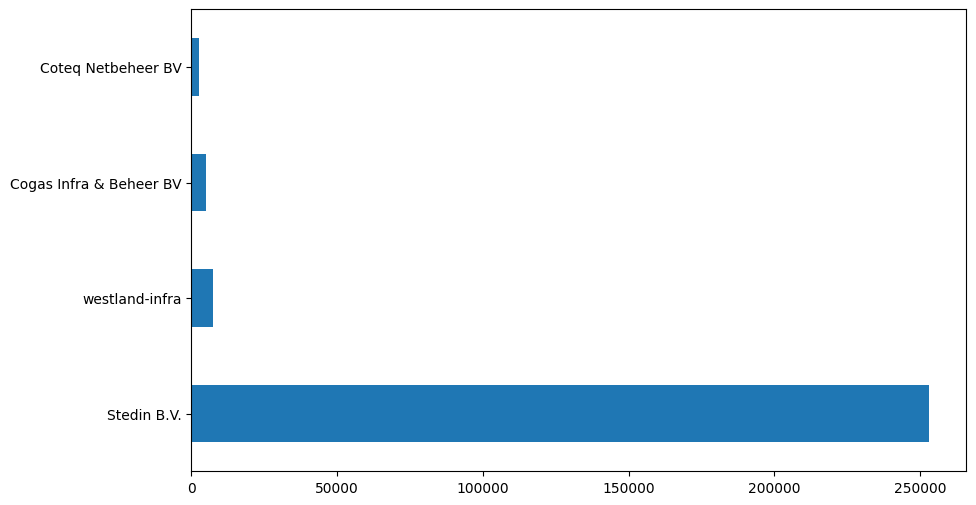

In [7]:
Electricity['net_manager'].value_counts().plot(kind='barh', figsize=(10, 6))

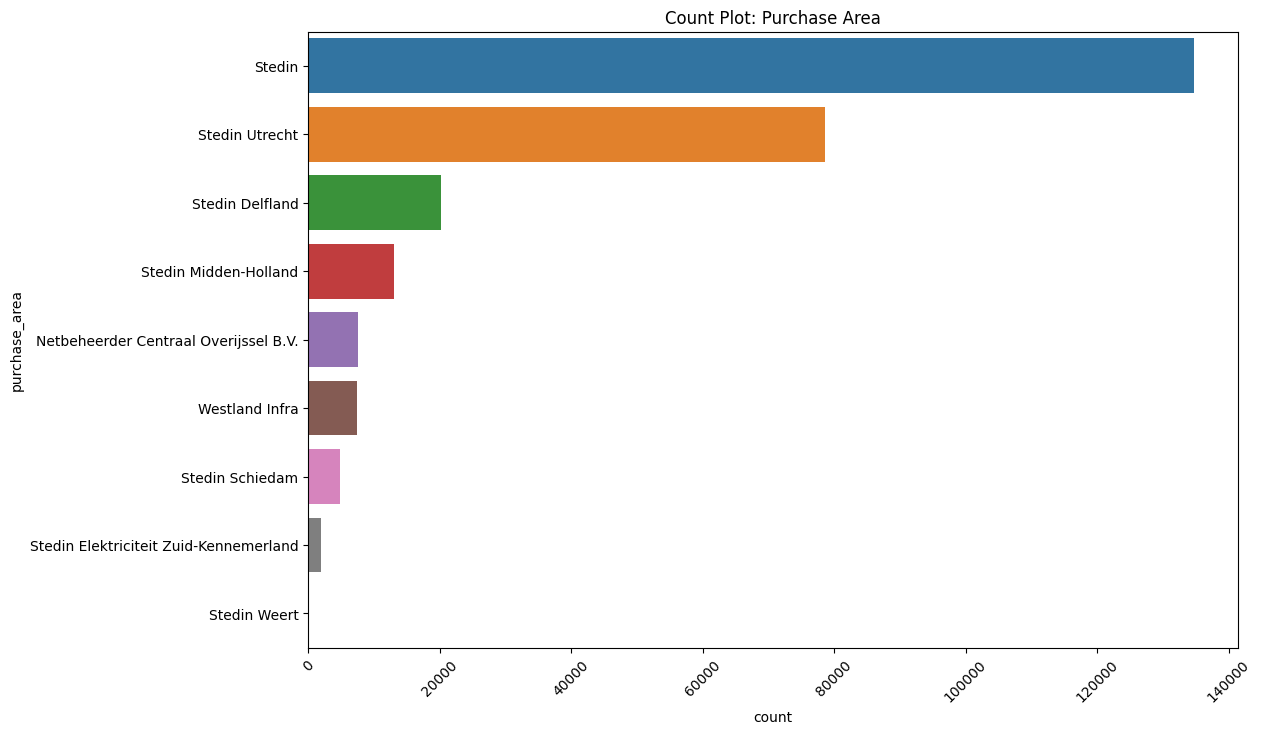

In [8]:
# countplot of purchase_area
plt.figure(figsize=(12, 8))
sns.countplot(y='purchase_area', data=Electricity, order=Electricity['purchase_area'].value_counts().index)
plt.title('Count Plot: Purchase Area')
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15980\596322635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Electricity.corr()


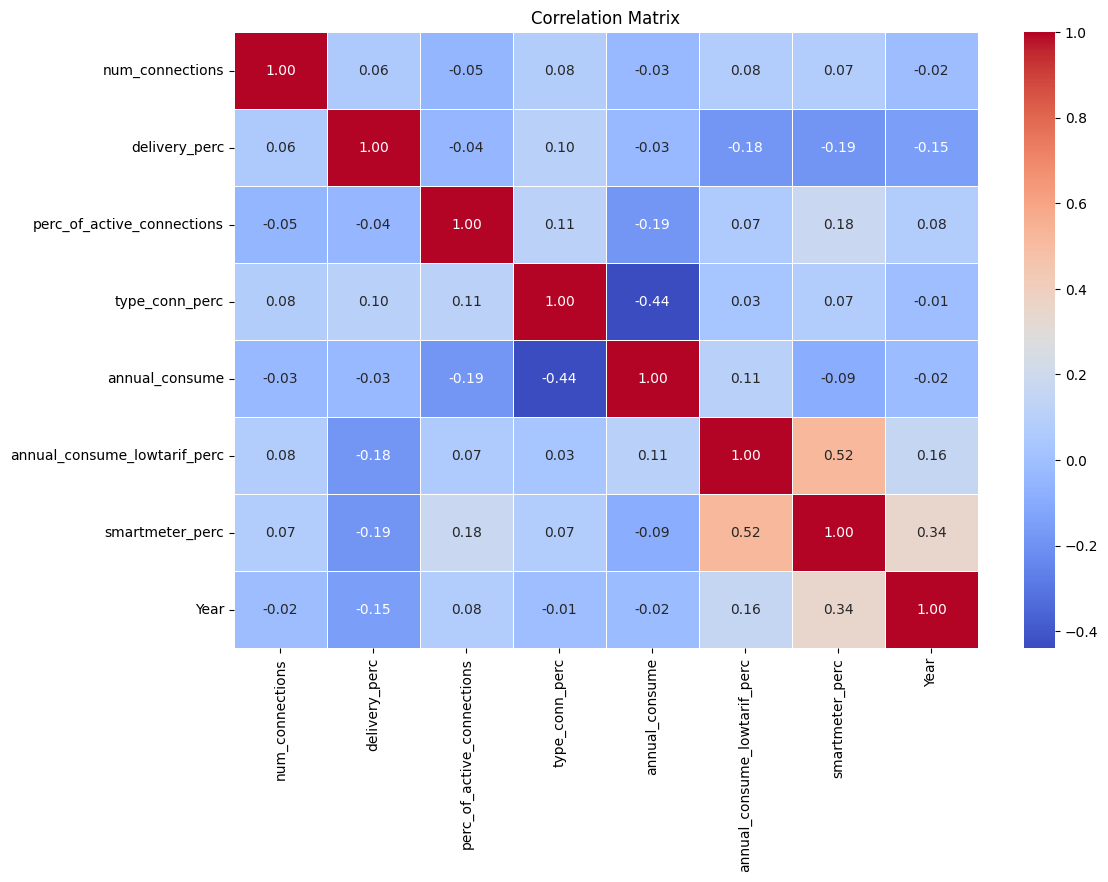

In [9]:
correlation_matrix = Electricity.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
#  Create numerical column list 
numerical_columns = Electricity.select_dtypes(include=['float64', 'int64']).columns
# numerical_Tcolumns = Etest.select_dtypes(include=['float64', 'int64']).columns
Electricity_numeric = Electricity[numerical_columns]

In [11]:
# display outliers
def find_outliers(data):
    # Calculate the interquartile range (IQR)
    for col in list(data.columns):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        num_outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
        print(f"{col} has {num_outliers} outliers")
    
find_outliers(Electricity_numeric)

num_connections has 19319 outliers
delivery_perc has 20441 outliers
perc_of_active_connections has 47580 outliers
type_conn_perc has 2 outliers
annual_consume has 25362 outliers
annual_consume_lowtarif_perc has 23217 outliers
smartmeter_perc has 0 outliers
Year has 0 outliers


In [12]:
from scipy.stats import skew
numerical_columns = Electricity.select_dtypes(include=['float64', 'int64']).columns
def check_skewness(data):
    skewness_result = pd.DataFrame({'Feature': numerical_columns, 'Skewness': [skew(data[col]) for col in numerical_columns]})
    return skewness_result
skewness_results = check_skewness(Electricity)

print(skewness_results)


                        Feature  Skewness
0               num_connections  8.951996
1                 delivery_perc -3.341615
2    perc_of_active_connections -8.326865
3                type_conn_perc -0.694291
4                annual_consume  5.151495
5  annual_consume_lowtarif_perc -2.035225
6               smartmeter_perc -0.471073
7                          Year -0.012087


In [13]:
Electricity.columns

Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'Year'],
      dtype='object')

In [14]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming your DataFrame is named 'electricity_df'
# # Replace this with your actual DataFrame

# # Convert 'Year' column to datetime type
# Electricity['Year'] = pd.to_datetime(Electricity['Year'], format='%Y')

# # Split the data into train and test sets based on the year
# train_df = Electricity[Electricity['Year'].isin([2018, 2019])]
# test_df = Electricity[Electricity['Year'] == 2020]

# # Sample preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['num_connections', 'perc_of_active_connections', 'delivery_perc', 'type_conn_perc', 'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc']),
#         ('cat', OneHotEncoder(), ['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'type_of_connection'])
#     ])


In [15]:
from sklearn.preprocessing import PowerTransformer, RobustScaler
from scipy.stats import zscore
skewed_features = ["num_connections", "delivery_perc", "perc_of_active_connections", "type_conn_perc", "annual_consume_lowtarif_perc", "smartmeter_perc"]
categorical_cols =  ['zipcode_from','zipcode_to', 'street', 'city', 'type_of_connection']
# # Log1p transformation
# skewed_features = ["num_connections", "delivery_perc", "perc_of_active_connections", "type_conn_perc", "annual_consume_lowtarif_perc", "smartmeter_perc"]
# Electricity[skewed_features] = np.log1p(Electricity[skewed_features])
# # with num_connections 
# # fill outliers
# robust_scaler = RobustScaler()
# Electricity[skewed_features] = robust_scaler.fit_transform(Electricity[skewed_features])
# # replace outliers with NaN
# z_scores = zscore(Electricity[skewed_features])
# outliers = (np.abs(z_scores) > 3).any(axis=1)
# Electricity.loc[outliers, skewed_features] = np.nan
# # replace NaN after outliers 
# Electricity[skewed_features] = Electricity[skewed_features].fillna(Electricity[skewed_features].median())
# # power transformer for further skew
# power_transformer = PowerTransformer()
# Electricity[skewed_features] = power_transformer.fit_transform(Electricity[skewed_features])


# Etest[skewed_features] = np.log1p(Etest[skewed_features])
# with num_connections 
# fill outliers
# robust_scaler = RobustScaler()
# Electricity[skewed_features] = robust_scaler.fit_transform(Electricity[skewed_features])
# # replace outliers with NaN
# z_scores = zscore(Etest[skewed_features])
# outliers = (np.abs(z_scores) > 3).any(axis=1)
# Etest.loc[outliers, skewed_features] = np.nan
# # replace NaN after outliers 
# Etest[skewed_features] = Etest[skewed_features].fillna(Etest[skewed_features].median())
# # power transformer for further skew
# power_transformer = PowerTransformer()
# Etest[skewed_features] = power_transformer.fit_transform(Etest[skewed_features])


In [16]:
# Electricity.head()

In [17]:
df_encoded_net_manager = pd.get_dummies(Electricity['net_manager'], prefix='net_manager')
Electricity = pd.concat([Electricity, df_encoded_net_manager], axis=1)
Electricity = Electricity.drop('net_manager', axis=1)
df_encoded_purchase_area = pd.get_dummies(Electricity['purchase_area'], prefix='purchase_area')
Electricity = pd.concat([Electricity, df_encoded_purchase_area], axis=1)
Electricity = Electricity.drop('purchase_area', axis=1)

In [18]:
categorical_Elec = Electricity[categorical_cols].apply(LabelEncoder().fit_transform)
Electricity = Electricity.drop(categorical_cols, axis = 1)
categorical_Elec

,zipcode_from,zipcode_to,street,city,type_of_connection
0,90348,89690,6779,67,2
1,90349,89691,6055,73,2
2,90350,89692,6055,73,2
3,90351,89693,6055,73,2
4,90352,89694,13791,73,2
...,...,...,...,...,...
91465,49382,48985,11979,146,5
91466,49383,48986,13248,146,5
91467,49384,48987,13248,146,5
91468,49385,48988,13248,146,5


In [19]:
Electricity = pd.concat([categorical_Elec, Electricity], axis =1 )
# # Etest = pd.concat([categorical_Etest, Etest], axis =1 )

In [20]:
# split etrain and etest by year with train 2018,2019 and test 2020
Etrain = Electricity[Electricity['Year'] != 2020]
Etest = Electricity[Electricity['Year'] == 2020]

In [21]:
Xetrain = Etrain.drop(['Year','annual_consume'], axis=1)
Yetrain = Etrain['annual_consume']
Xetest = Etest.drop(['Year','annual_consume'],axis =1)
Yetest = Etrain['annual_consume']

In [22]:
# # using minmax scaler for all dataset
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# Xetrain = pd.DataFrame(scaler.fit_transform(Xetrain), columns = Xetrain.columns)


In [23]:
# using standard scaler for all dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xetrain = pd.DataFrame(scaler.fit_transform(Xetrain), columns = Xetrain.columns)

In [24]:
Xetrain.columns

Index(['zipcode_from', 'zipcode_to', 'street', 'city', 'type_of_connection',
       'num_connections', 'delivery_perc', 'perc_of_active_connections',
       'type_conn_perc', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'net_manager_Cogas Infra & Beheer BV', 'net_manager_Coteq Netbeheer BV',
       'net_manager_Stedin B.V.', 'net_manager_westland-infra',
       'purchase_area_Netbeheerder Centraal Overijssel B.V.',
       'purchase_area_Stedin', 'purchase_area_Stedin Delfland',
       'purchase_area_Stedin Elektriciteit Zuid-Kennemerland',
       'purchase_area_Stedin Midden-Holland', 'purchase_area_Stedin Schiedam',
       'purchase_area_Stedin Utrecht', 'purchase_area_Stedin Weert',
       'purchase_area_Westland Infra'],
      dtype='object')

In [25]:
Xetest.columns

Index(['zipcode_from', 'zipcode_to', 'street', 'city', 'type_of_connection',
       'num_connections', 'delivery_perc', 'perc_of_active_connections',
       'type_conn_perc', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'net_manager_Cogas Infra & Beheer BV', 'net_manager_Coteq Netbeheer BV',
       'net_manager_Stedin B.V.', 'net_manager_westland-infra',
       'purchase_area_Netbeheerder Centraal Overijssel B.V.',
       'purchase_area_Stedin', 'purchase_area_Stedin Delfland',
       'purchase_area_Stedin Elektriciteit Zuid-Kennemerland',
       'purchase_area_Stedin Midden-Holland', 'purchase_area_Stedin Schiedam',
       'purchase_area_Stedin Utrecht', 'purchase_area_Stedin Weert',
       'purchase_area_Westland Infra'],
      dtype='object')

In [26]:
Xetrain.shape

(268277, 24)

In [27]:
Xetest.shape

(0, 24)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Xetrain = Etrain.drop(['annual_consume'], axis=1)
# Yetrain = Etrain['annual_consume']
# Xetest = Etest.drop(['annual_consume'],axis =1)
# Yetest = Etrain['annual_consume']

def split_train_evaluate_regression_models(X, y, test_size=0.2, random_state=42):
    """
    Splits the dataset, trains multiple regression models, and evaluates them using MAE, R2, and RMSE metrics.

    Parameters:
    - X: Features DataFrame
    - y: Target variable Series
    - test_size: Size of the test set (default: 0.2)
    - random_state: Random state for reproducibility (default: 42)

    Returns:
    - A DataFrame containing evaluation metrics for each model
    """
    test_size = 0.2
    random_state = 42
    # Train-test split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Split the temp data into validation (10%) and final test (10%)
    X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=random_state)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=random_state),
        'Random Forest Regressor': RandomForestRegressor(random_state=random_state),
        'XGB Regressor': XGBRegressor(random_state=random_state),
        'LGBM Regressor': LGBMRegressor(random_state=random_state),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=random_state)
    }

    # Evaluate models
    results = []
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        # Save results
        results.append({
            'Model': model_name,
            'MAE': mae,
            'R2': r2,
            'RMSE': rmse
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    return results_df

# Assuming X_train and y_train are your preprocessed training data
evaluation_results = split_train_evaluate_regression_models(Xetrain, Yetrain)
# Display the results
print(evaluation_results)


                         Model          MAE        R2         RMSE
0            Linear Regression  1455.030851  0.343661  2479.289760
1      Decision Tree Regressor  1117.213318  0.325888  2512.634481
2      Random Forest Regressor   873.474480  0.659097  1786.810254
3                XGB Regressor  1080.270333  0.583255  1975.597659
4               LGBM Regressor  1118.365634  0.558467  2033.502487
5  Gradient Boosting Regressor  1185.892092  0.507531  2147.597042
